In [65]:
import utils
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout, LSTM
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import time

In [66]:
EPOCHS = 10000
BATCH_SIZE = 64
trading_days = 30
model_type = "xtd_rnn"

In [67]:
start = time.time()
raw_df = utils.download()
x = utils.process(df=raw_df, trading_days=trading_days)
utils.test(x=x)
x = np.expand_dims(x, 1)
# normalize the dataset
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x, y = utils.convert2matrix(data_arr=x, look_back=1)
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
end=time.time()
print(end-start)
print(X_train.shape, y_train.shape, x_test.shape, y_test.shape)

ADF Statistic: -5.061658
p-value: 0.000017
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
0.6410107612609863
(6548, 1, 1) (6548, 1) (1637, 1, 1) (1637, 1)


In [68]:
start = time.time()
model = Sequential()
# Input layer
model.add(LSTM(20, input_shape=(X_train.shape[1], 1),return_sequences=True))
model.add(Dropout(0.1))
# Hidden layer
model.add(Dense(units = 10,activation="relu"))
model.add(GRU(10))
model.add(Dropout(0.1))
# Output Layer
model.add(Dense(units = 1))
model.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [69]:
early_stop = EarlyStopping(monitor = 'val_mse',
                                               patience = 100)
history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split = 0.2,
    verbose=1,
    shuffle=False,
    callbacks = [early_stop]
)

mse = history.history['mse']
val_mse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/10000
82/82 [==============================] - 3s 17ms/step - loss: 0.0712 - mse: 0.0712 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 2/10000
82/82 [==============================] - 1s 10ms/step - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 3/10000
82/82 [==============================] - 1s 9ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 4/10000
82/82 [==============================] - 1s 9ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 5/10000
82/82 [==============================] - 1s 9ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 6/10000
82/82 [==============================] - 1s 9ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 7/10000
82/82 [==============================] - 1s 9ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 8/10000
82/82 [==============================] - 1s 9ms/step 

In [70]:
epochs = range(len(mse))
n_epochs = len(mse)
pred = model.predict(x_test)
pred = np.squeeze(pred,1)
y_test = np.squeeze(y_test,1)
prediction = utils.compute_prediction_frame(y_labels=y_test,predicted=pred)

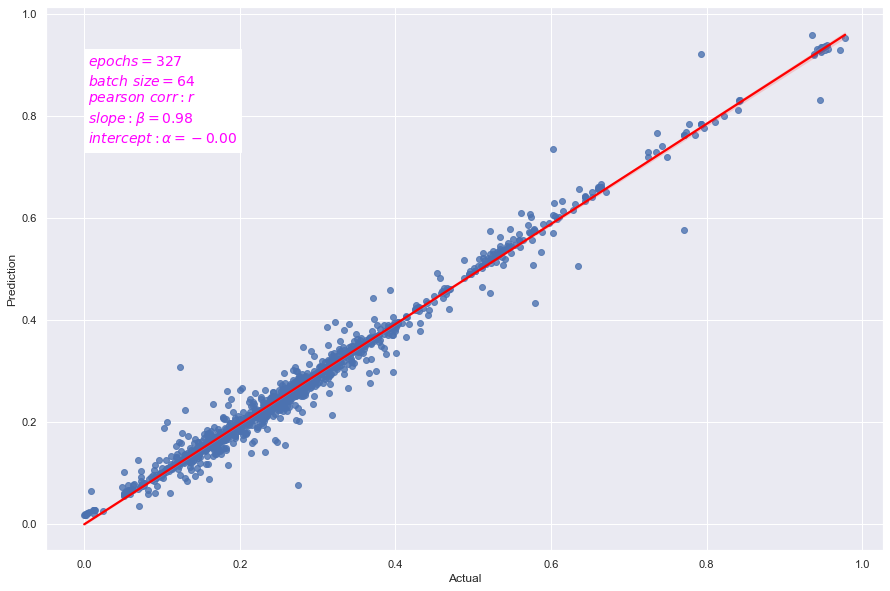

Beta of  Prediction  = 0.9809
Alpha of  Prediction  = -0.0007


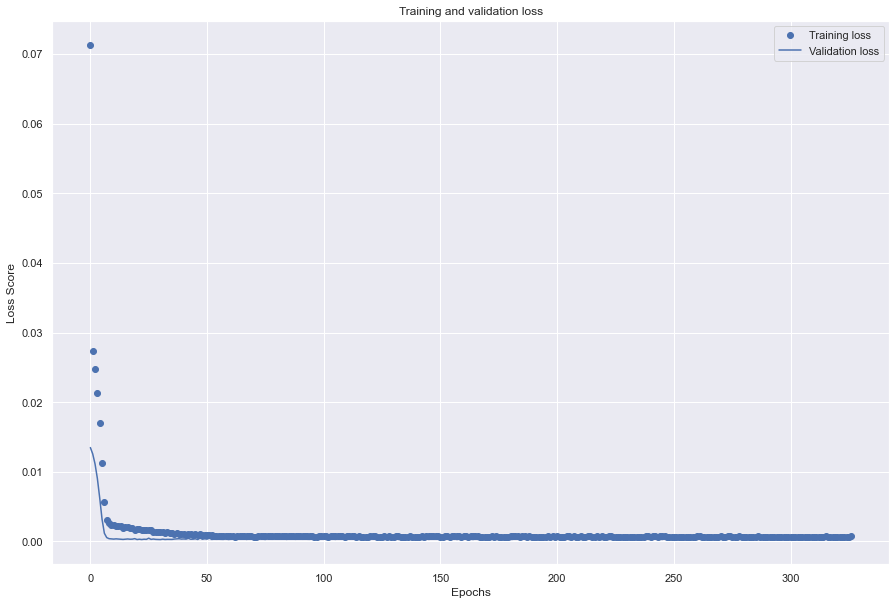

259.3402452468872


In [71]:
utils.scatterplotRegression(df=prediction, model_type=model_type, EPOCHS=n_epochs,BATCH_SIZE=BATCH_SIZE)
utils.error_evaluation(epochs,mse,val_mse,loss,val_loss)
end=time.time()
print(end-start)

In [72]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_true=y_test,y_pred=pred))
utils.print_error(y_train=y_train,y_test=y_test,train_predict=np.squeeze(model.predict(X_train),1),test_predict=pred)

0.012360741921660093
Train RMSE: 0.018 RMSE
Test RMSE: 0.021 RMSE


In [73]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 20)             1760      
                                                                 
 dropout_16 (Dropout)        (None, 1, 20)             0         
                                                                 
 dense_16 (Dense)            (None, 1, 10)             210       
                                                                 
 gru_8 (GRU)                 (None, 10)                660       
                                                                 
 dropout_17 (Dropout)        (None, 10)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,641
Trainable params: 2,641
Non-traina